Q
[8.25936711e-09 9.26833686e-09 9.41728781e-09 9.31287812e-09
 9.19417093e-09 9.17767342e-09 9.37999301e-09 9.24388194e-09
 9.21726216e-09 9.26045228e-09 8.98595278e-09]
Q2
[8.92904553e-09 8.79706550e-09 8.85506168e-09 8.91298502e-09
 8.30029320e-09 9.05365081e-09 9.01453874e-09 9.02613069e-09
 9.00685933e-09 8.63389114e-09 8.91318532e-09 8.64033921e-09]
Q3
[9.15227167e-09 8.01161322e-09 8.57394861e-09 8.91298502e-09
 8.93877729e-09 9.17767342e-09 9.37999301e-09 9.02613069e-09
 9.00685933e-09 8.98391375e-09 9.02894097e-09 9.10115730e-09]
Q4
[6.25033187e-09 6.28361821e-09 6.32504405e-09 6.11989134e-09
 6.12944728e-09 6.20113069e-09 6.21272264e-09 6.25811728e-09
 6.16258796e-09 6.06705864e-09 6.01929398e-09 6.22104423e-09]
Q5
[4.68774890e-09 4.55562320e-09 4.21669604e-09 4.25731571e-09
 4.34169183e-09 4.58883671e-09 4.50726937e-09 5.29533001e-09
 5.21449750e-09 5.13366500e-09 5.32476006e-09 5.06899900e-09]
Q6
[7.14323642e-09 7.22616094e-09 7.30893980e-09 7.56253275e-09
 7.53411229e-09 7

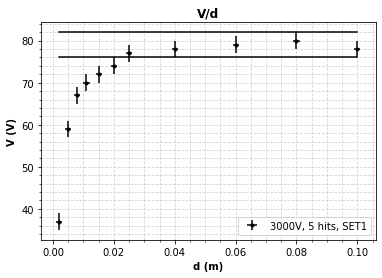

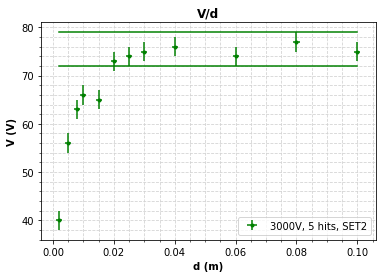

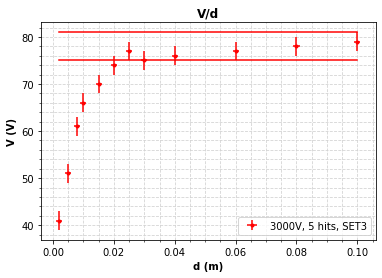

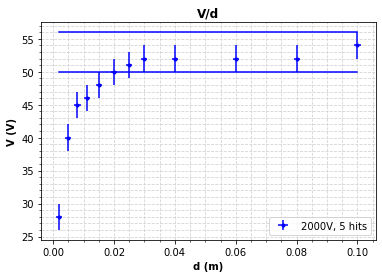

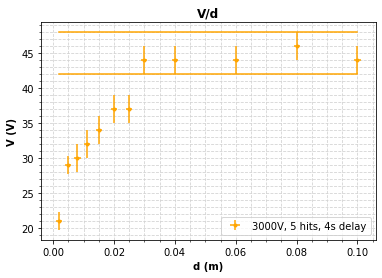

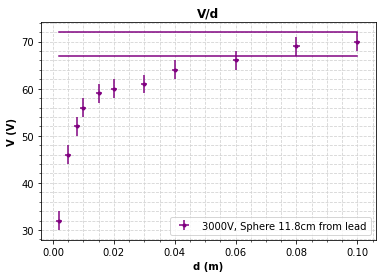

Q1
8.927e-09
3.3899999999999997e-10
Q2
8.5315e-09
3.955e-10
Q3
8.814e-09
3.3899999999999997e-10
Q4
5.989e-09
3.3899999999999997e-10
Q4*3/2
8.983499999999999e-09
5.085e-10
Q5
5.0285e-09
3.955e-10
Q6
7.8535e-09
1.6949999999999998e-10
Q fittato ed errore
[9.1981607e-09]
[1.19765943e-10]


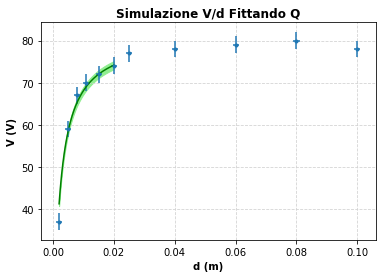

Q fittato ed errore
[8.79076206e-09]
[1.18877213e-10]


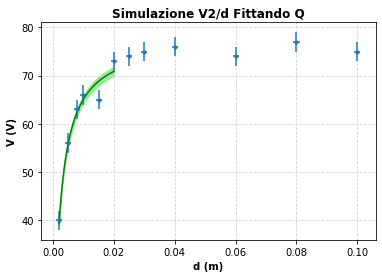

Q fittato ed errore
[8.81005243e-09]
[1.68260786e-10]


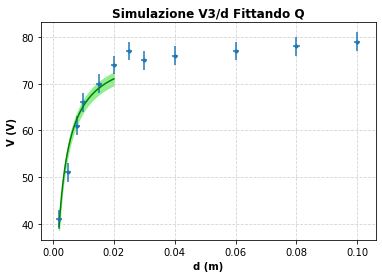

Q fittato ed errore
[6.20662763e-09]
[3.48012103e-11]


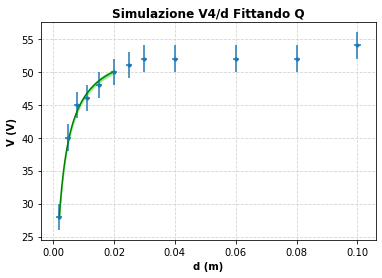

Q fittato ed errore
[4.41170685e-09]
[7.36757934e-11]


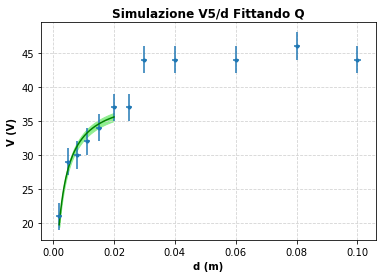

Q fittato ed errore
[7.4103252e-09]
[6.18861759e-11]


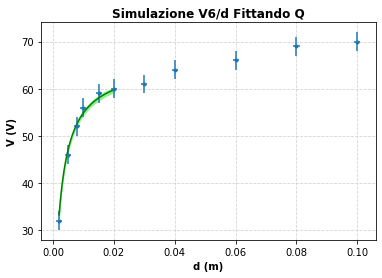

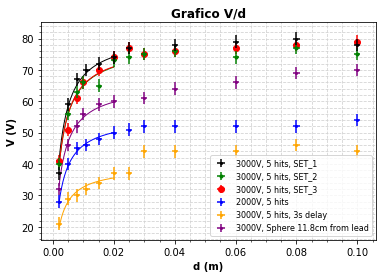

In [1]:
#1.6cm è quando si inizia a perdere l'approssimazione di faccie piane e parallele
#d = 0.015 << 0.158 = sqrt(A)

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Verr = 2
V = np.array([37,59,67,70,72,74,77,78,79,80,78])

d = np.array([0.002,0.005,0.008,0.011,0.015,0.02,0.025,0.04,0.06,0.08,0.1])
derr = 0.001

d2 = np.array([0.002,0.005,0.008,0.01,0.015,0.02,0.025,0.03,0.04,0.06,0.08,0.1])
V2 = np.array([40,56,63,66,65,73,74,75,76,74,77,75])
Verr2 = 2

d3 = np.array([0.002,0.005,0.008,0.01,0.015,0.02,0.025,0.03,0.04,0.06,0.08,0.1])
V3 = np.array([41,51,61,66,70,74,77,75,76,77,78,79])

d4 = np.array([0.002,0.005,0.008,0.011,0.015,0.02,0.025,0.03,0.04,0.06,0.08,0.1])
V4 = np.array([28,40,45,46,48,50,51,52,52,52,52,54])


d5 = np.array([0.002,0.005,0.008,0.011,0.015,0.02,0.025,0.03,0.04,0.06,0.08,0.1])
V5 = np.array([21, 29, 30, 32, 34, 37, 37, 44, 44, 44, 46, 44])
Verr5 = np.array([1.3,1.3,2,2,2,2,2,2,2,2,2,2])

d6 = np.array([0.002,0.005,0.008,0.01,0.015,0.02,0.03,0.04,0.06,0.08,0.1])
#V6 = np.array([6,10,11,12,13,14,14,16,16,17,17])
V6 = np.array([32,46,52,56,59,60,61,64,66,69,70])
V6err = 2
#distanza sfera condensatore circa 11.8 


eps0 = 8.859E-12
DBacchetta = 0.0320

Dc = 0.178
Dcerr = 0.0005
#Dc = Dc-np.random.normal(0, Dcerr, 1)
#Dc = 

A = np.pi/4*Dc**2
A_err = A*2*Dcerr/Dc

Ce = 1.13e-10
Ce_err = 2.76824077e-11
D1 = 0.09945
D2 = 0.14575
D2 = 0.1492

D1err = 0.0001
D2err = 0.003
L = 0.1554
Lerr = 0.0001



b = eps0*A
berr = b*A_err/A



Qvalues = (b/d+Ce)*V
Qvalues2 = (b/d2+Ce)*V2
Qvalues3 = (b/d3+Ce)*V3
Qvalues4 = (b/d4+Ce)*V4
Qvalues5 = (b/d5+Ce)*V5
Qvalues6 = (b/d6+Ce)*V6

print("Q")
print(Qvalues)
print("Q2")
print(Qvalues2)
print("Q3")
print(Qvalues3)
print("Q4")
print(Qvalues4)
print("Q5")
print(Qvalues5)
print("Q6")
print(Qvalues6)


#GRAFICO1 V/d 


fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, markersize=3,yerr=Verr, fmt='o', color="black", label="3000V, 5 hits, SET1")

x = np.linspace(min(d),max(d),1000)
ymax = np.ones(1000)*82
ymin = np.ones(1000)*76

Q1 = 79*Ce
Q1_err = 3*Ce

plt.plot(x,ymax,  color="black")
plt.plot(x,ymin,  color="black")


plt.legend(loc="lower right")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()

#GRAFICO2 V/d 

fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d2, V2, xerr=derr, markersize=3,yerr=Verr2, fmt='o', color="green", label="3000V, 5 hits, SET2")

x = np.linspace(min(d2),max(d2),1000)
ymax = np.ones(1000)*79
ymin = np.ones(1000)*72

Q2 = 75.5*Ce
Q2_err = 3.5*Ce

plt.plot(x,ymax,color="green")
plt.plot(x,ymin,  color="green")

plt.legend(loc="lower right")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()

#GRAFICO3 V/d 

fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d3, V3, xerr=derr, markersize=3,yerr=Verr2, fmt='o', color="red", label="3000V, 5 hits, SET3")

x = np.linspace(min(d3),max(d3),1000)
ymax = np.ones(1000)*81
ymin = np.ones(1000)*75

Q3 = 78*Ce
Q3_err = 3*Ce

plt.plot(x,ymax,  color="red")
plt.plot(x,ymin, color="red")

plt.legend(loc="lower right")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()

#GRAFICO4 V/d 

fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d4, V4, xerr=derr, markersize=3,yerr=Verr2, fmt='o', color="blue", label="2000V, 5 hits")

x = np.linspace(min(d4),max(d4),1000)
ymax = np.ones(1000)*56
ymin = np.ones(1000)*50

Q4 = 53*Ce
Q4_err = 3*Ce

plt.plot(x,ymax,  color="blue")
plt.plot(x,ymin,  color="blue")

plt.legend(loc="lower right")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()

#GRAFICO5 V/d 

fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d5, V5, xerr=derr, markersize=3,yerr=Verr5, fmt='o', color="orange", label="3000V, 5 hits, 4s delay")

x = np.linspace(min(d4),max(d4),1000)
ymax = np.ones(1000)*48
ymin = np.ones(1000)*42

Q5 = 44.5*Ce
Q5_err = 3.5*Ce

plt.plot(x,ymax,  color="orange")
plt.plot(x,ymin,  color="orange")

plt.legend(loc="lower right")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()

#GRAFICO6 V/d 

fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d6, V6, xerr=derr, markersize=3,yerr=V6err, fmt='o', color="purple", label="3000V, Sphere 11.8cm from lead")

x = np.linspace(min(d6),max(d6),1000)
ymax = np.ones(1000)*72
ymin = np.ones(1000)*67

Q6 = 69.5*Ce
Q6_err = 1.5*Ce

plt.plot(x,ymax,  color="purple")
plt.plot(x,ymin,  color="purple")

plt.legend(loc="lower right")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()




print("Q1")
print(Q1)
print(Q1_err)
print("Q2")
print(Q2)
print(Q2_err)
print("Q3")
print(Q3)
print(Q3_err)
print("Q4")
print(Q4)
print(Q4_err)
print("Q4*3/2")
print(Q4*3/2)
print(Q4_err*3/2)
print("Q5")
print(Q5)
print(Q5_err)
print("Q6")
print(Q6)
print(Q6_err)

#V1 fit

from scipy.optimize import curve_fit

def fitobjective(x,Q):
	return Q/((eps0*A/x)+(Ce))
guess = np.array([Q1])

popt,pcov = curve_fit(fitobjective, d[:6], V[:6],p0=guess)
err = np.sqrt(np.diag(pcov))
Q_fit_err = err
Q_fit = popt
print("Q fittato ed errore")
print(Q_fit)
print(Q_fit_err)



x = np.linspace(min(d),d[5],1000)
y = fitobjective(x, Q_fit)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.plot(x, y, '-', color='green')

x_err_min = fitobjective(x,Q_fit-Q_fit_err);# 3 sigma errore
x_err_max = fitobjective(x,Q_fit+Q_fit_err);# 3 sigma errore
plt.fill_between(x,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.title("Simulazione V/d Fittando Q",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, yerr=Verr, fmt='.')

plt.show()

#V2 fit

def fitobjective(x,Q):
	return Q/((eps0*A/x)+(Ce))
guess = np.array([Q2])

popt,pcov = curve_fit(fitobjective, d2[:6], V2[:6],p0=guess)
err = np.sqrt(np.diag(pcov))
Q_fit_err = err
Q_fit = popt
print("Q fittato ed errore")
print(Q_fit)
print(Q_fit_err)



x2 = np.linspace(min(d),d[5],1000)
y2 = fitobjective(x2, Q_fit)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.plot(x2, y2, '-', color='green')

x_err_min = fitobjective(x2,Q_fit-Q_fit_err);# 3 sigma errore
x_err_max = fitobjective(x2,Q_fit+Q_fit_err);# 3 sigma errore
plt.fill_between(x2,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.title("Simulazione V2/d Fittando Q",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d2, V2, xerr=derr, yerr=Verr, fmt='.')

plt.show()


#V3 fit

def fitobjective(x,Q):
	return Q/((eps0*A/x)+(Ce))
guess = np.array([Q3])

popt,pcov = curve_fit(fitobjective, d3[:6], V3[:6],p0=guess)
err = np.sqrt(np.diag(pcov))
Q_fit_err = err
Q_fit = popt
print("Q fittato ed errore")
print(Q_fit)
print(Q_fit_err)



x3 = np.linspace(min(d),d[5],1000)
y3 = fitobjective(x3, Q_fit)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.plot(x3, y3, '-', color='green')

x_err_min = fitobjective(x3,Q_fit-Q_fit_err);# 3 sigma errore
x_err_max = fitobjective(x3,Q_fit+Q_fit_err);# 3 sigma errore
plt.fill_between(x3,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.title("Simulazione V3/d Fittando Q",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d3, V3, xerr=derr, yerr=Verr, fmt='.')

plt.show()

#V4 fit

def fitobjective(x,Q):
	return Q/((eps0*A/x)+(Ce))
guess = np.array([Q4])

popt,pcov = curve_fit(fitobjective, d4[:6], V4[:6],p0=guess)
err = np.sqrt(np.diag(pcov))
Q_fit_err = err
Q_fit = popt
print("Q fittato ed errore")
print(Q_fit)
print(Q_fit_err)



x4 = np.linspace(min(d),d[5],1000)
y4 = fitobjective(x4, Q_fit)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.plot(x4, y4, '-', color='green')

x_err_min = fitobjective(x4,Q_fit-Q_fit_err);# 3 sigma errore
x_err_max = fitobjective(x4,Q_fit+Q_fit_err);# 3 sigma errore
plt.fill_between(x4,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.title("Simulazione V4/d Fittando Q",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d4, V4, xerr=derr, yerr=Verr, fmt='.')

plt.show()


#V5 fit

def fitobjective(x,Q):
	return Q/((eps0*A/x)+(Ce))
guess = np.array([Q5])

popt,pcov = curve_fit(fitobjective, d5[:6], V5[:6],p0=guess)
err = np.sqrt(np.diag(pcov))
Q_fit_err = err
Q_fit = popt
print("Q fittato ed errore")
print(Q_fit)
print(Q_fit_err)



x5 = np.linspace(min(d),d[5],1000)
y5 = fitobjective(x5, Q_fit)


fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.plot(x5, y5, '-', color='green')

x_err_min = fitobjective(x5,Q_fit-Q_fit_err);# 3 sigma errore
x_err_max = fitobjective(x5,Q_fit+Q_fit_err);# 3 sigma errore
plt.fill_between(x5,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.title("Simulazione V5/d Fittando Q",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d5, V5, xerr=derr, yerr=Verr, fmt='.')

plt.show()

#V6 fit

def fitobjective(x,Q):
	return Q/((eps0*A/x)+(Ce))
guess = np.array([Q6])

popt,pcov = curve_fit(fitobjective, d6[:6], V6[:6],p0=guess)
err = np.sqrt(np.diag(pcov))
Q_fit_err = err
Q_fit = popt
print("Q fittato ed errore")
print(Q_fit)
print(Q_fit_err)



x6 = np.linspace(min(d),d[5],1000)
y6 = fitobjective(x6, Q_fit)


fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.plot(x6, y6, '-', color='green')

x_err_min = fitobjective(x6,Q_fit-Q_fit_err);# 3 sigma errore
x_err_max = fitobjective(x6,Q_fit+Q_fit_err);# 3 sigma errore
plt.fill_between(x6,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.title("Simulazione V6/d Fittando Q",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d6, V6, xerr=derr, yerr=V6err, fmt='.')

plt.show()


#GRAFICI V/d con fit

fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("Grafico V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, markersize=2,yerr=Verr, fmt='o', color="black", label="3000V, 5 hits, SET_1",zorder=10)
plt.errorbar(d2, V2, xerr=derr, markersize=3,yerr=Verr2, fmt='o', color="green", label="3000V, 5 hits, SET_2",zorder=9)
plt.errorbar(d3, V3, xerr=derr, markersize=6,yerr=Verr2, fmt='o', color="red", label="3000V, 5 hits, SET_3")
plt.errorbar(d4, V4, xerr=derr, markersize=2,yerr=Verr2, fmt='o', color="blue", label="2000V, 5 hits")
plt.errorbar(d5, V5, xerr=derr, markersize=2,yerr=Verr2, fmt='o', color="orange", label="3000V, 5 hits, 3s delay")
plt.errorbar(d6, V6, xerr=derr, markersize=2,yerr=Verr2, fmt='o', color="purple", label="3000V, Sphere 11.8cm from lead")
plt.plot(x, y, '-', color='black', linewidth=1)
plt.plot(x2, y2, '-', color='green', linewidth=1)
plt.plot(x3, y3, '-', color='red', linewidth=1)
plt.plot(x4, y4, '-', color='blue', linewidth=1)
plt.plot(x5, y5, '-', color='orange', linewidth=1)
plt.plot(x6, y6, '-', color='purple', linewidth=1)
plt.legend(loc="lower right", prop={'size': 8})
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()

# New Section